100%|██████████| 100/100 [00:00<00:00, 1352.97it/s]


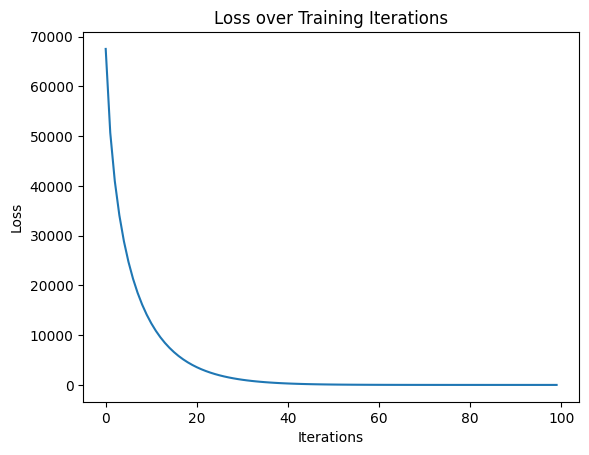

Result 2: 
w1=0.2570165991783142, 
w2=0.25288236141204834, 
w3=0.24734966456890106, 
w4=0.2507689893245697


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
from colorama import Fore, Style

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.w1 = nn.Parameter(torch.tensor(1, dtype=torch.float32))
        self.w2 = nn.Parameter(torch.tensor(1, dtype=torch.float32))
        self.w3 = nn.Parameter(torch.tensor(1, dtype=torch.float32))
        self.w4 = nn.Parameter(torch.tensor(1, dtype=torch.float32))

    def forward(self, x1, x2, x3, x4):
        n1 = x1 * self.w1
        n2 = x2 * self.w2
        n3 = x3 * self.w3
        n4 = x4 * self.w4
        y = n1 + n2 + n3 + n4
        return y

# Instantiate the model, loss function, and optimizer
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)

# Training loop
losses = []
for i in tqdm(range(100)):
    # First dataset
    inputs1 = torch.tensor([90.0, 80.0, 80.0, 70.0], dtype=torch.float32)
    target1 = torch.tensor([84.0], dtype=torch.float32)
    
    # Second dataset
    inputs2 = torch.tensor([80.0, 90.0, 100.0, 90.0], dtype=torch.float32)
    target2 = torch.tensor([86.0], dtype=torch.float32)
    
    # Third dataset
    inputs3 = torch.tensor([90.0, 100.0, 70.0, 100.0], dtype=torch.float32)
    target3 = torch.tensor([92.0], dtype=torch.float32)
    
    optimizer.zero_grad()
    
    # Forward and backward pass for each dataset
    outputs1 = model(*inputs1)
    loss1 = criterion(outputs1, target1)
    loss1.backward()

    outputs2 = model(*inputs2)
    loss2 = criterion(outputs2, target2)
    loss2.backward()

    outputs3 = model(*inputs3)
    loss3 = criterion(outputs3, target3)
    loss3.backward()

    optimizer.step()
    
    # Average loss over the three datasets
    avg_loss = (loss1.item() + loss2.item() + loss3.item()) / 3.0
    losses.append(avg_loss)

# Plot the loss
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Training Iterations')
plt.show()

# Display results
print(Fore.GREEN + f"Result 2: \nw1={model.w1.item()}, \nw2={model.w2.item()}, \nw3={model.w3.item()}, \nw4={model.w4.item()}" + Style.RESET_ALL)
